In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# โหลดข้อมูลตัวเลข (64 features)
digits = load_digits()
X, y = digits.data, digits.target

# ปรับขนาดข้อมูลให้เป็นมาตรฐาน
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ฟังก์ชันช่วย Plot ข้อมูลหลังการลดมิติ
def plot_2d(X_transformed, y, title):
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='tab10', alpha=0.7, edgecolors='k')    
    # plt.legend(handles=scatter.legend_elements()[0], labels=digits.target_names)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


PCA อธิบายข้อมูลได้ 21.59%


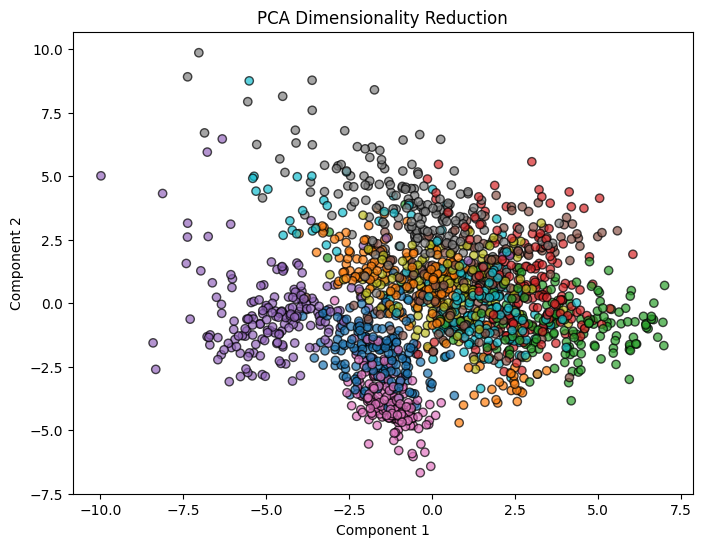

In [3]:
from sklearn.decomposition import PCA

# ลดมิติจาก 64 → 2 มิติ
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# แสดงสัดส่วนของข้อมูลที่ PCA อธิบายได้
explained_variance = np.sum(pca.explained_variance_ratio_) * 100
print(f"PCA อธิบายข้อมูลได้ {explained_variance:.2f}%")

# วาดผลลัพธ์
plot_2d(X_pca, y, "PCA Dimensionality Reduction")


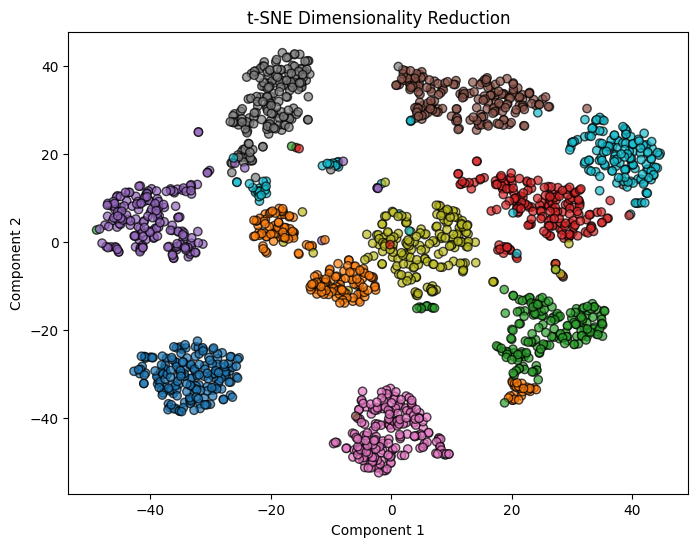

In [4]:
# t-SNE (t-Distributed Stochastic Neighbor Embedding)

from sklearn.manifold import TSNE

# ลดมิติจาก 64 → 2 มิติ โดยใช้ t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# วาดผลลัพธ์
plot_2d(X_tsne, y, "t-SNE Dimensionality Reduction")


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


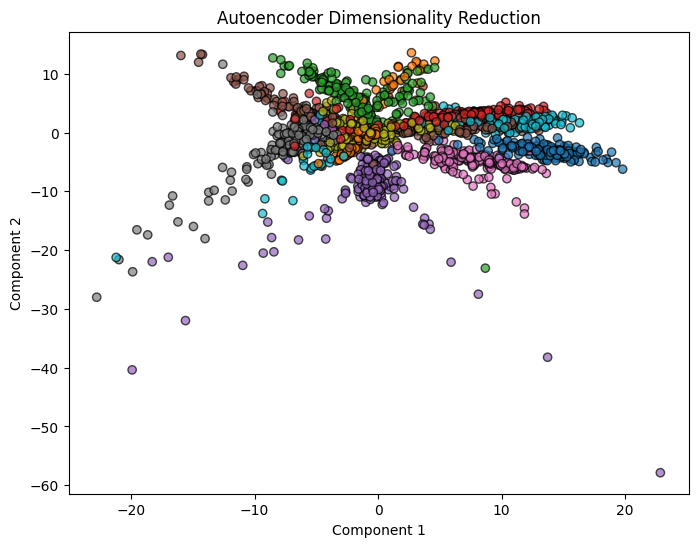

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# สร้าง Autoencoder (ลดจาก 64 → 2 มิติ)
input_dim = X_scaled.shape[1]

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(2, activation='linear')(encoded)

# Decoder
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_dim, activation='linear')(decoded)

# สร้าง Autoencoder Model
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

# คอมไพล์โมเดล
autoencoder.compile(optimizer='adam', loss='mse')

# ฝึกสอนโมเดล
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, verbose=0)

# ลดมิติข้อมูล
X_autoenc = encoder.predict(X_scaled)

# วาดผลลัพธ์
plot_2d(X_autoenc, y, "Autoencoder Dimensionality Reduction")
